__Understanding GD step by step__

In [153]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression # OLS Implementation

In [63]:
X, y = make_regression(n_samples=4, 
                       n_features=1,
                       n_informative=1,
                       n_targets=1,
                       noise=80,
                       random_state=13)

In [64]:
X, y

(array([[-0.71239066],
        [ 0.45181234],
        [-0.04450308],
        [ 0.75376638]]),
 array([  7.21786552,  16.04609925, -27.83756166, 144.36688189]))

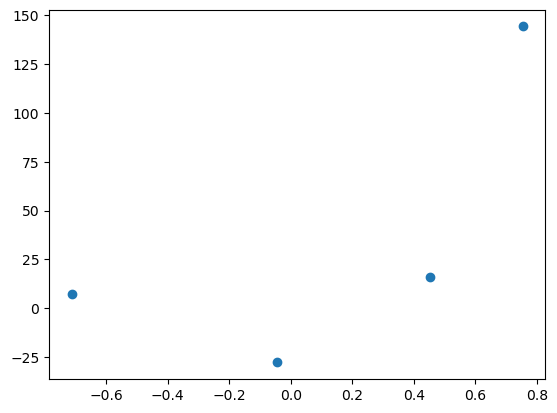

In [65]:
plt.scatter(X, y)
plt.show()

In [66]:
reg  = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [67]:
print(f'coefficient : {reg.coef_}')
print(f'intercetp : {reg.intercept_}')

coefficient : [78.35063668]
intercetp : 26.15963284313262


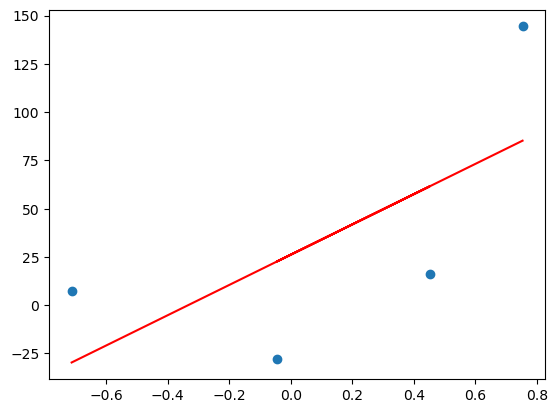

In [68]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color= 'red')
plt.show()

Let's Apply GD assuming slope is constant `m = 78.35063668` and starting value of intercept  b = 0

In [69]:
m = 78.35

y_pred = ((m * X) + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

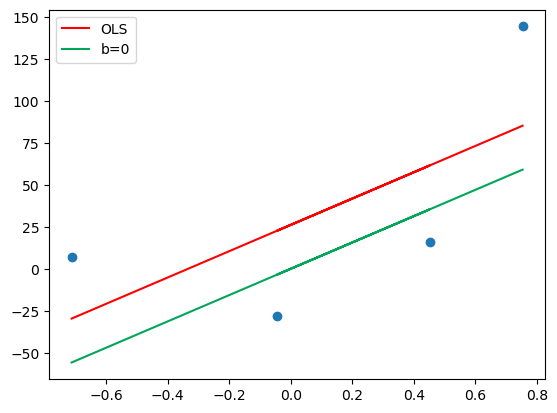

In [70]:
def plot():
    plt.scatter(X, y)
    plt.plot(X, reg.predict(X), color = 'red', label = 'OLS')
    plt.plot(X, y_pred, color = '#00a65a', label = 'b=0')
    plt.legend()
    plt.show()

plot()

__Calculating New Intercept__

In [71]:
print(m * X.ravel() - 0)
print(y_pred)

[-55.81580837  35.39949674  -3.48681619  59.05759577]
[-55.81580837  35.39949674  -3.48681619  59.05759577]


In [72]:
b = 100 # taking a random intercept 

def get_intercept(b, learning_rate):

    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    step_size = learning_rate * loss_slope
    b  = b - step_size # calculating new intercept 

    return b 


new_intercept = get_intercept(b, 0.1)
new_intercept

40.927763408209216

In [73]:
y_pred1 = ((m * X) + b).reshape(4)
y_pred1

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

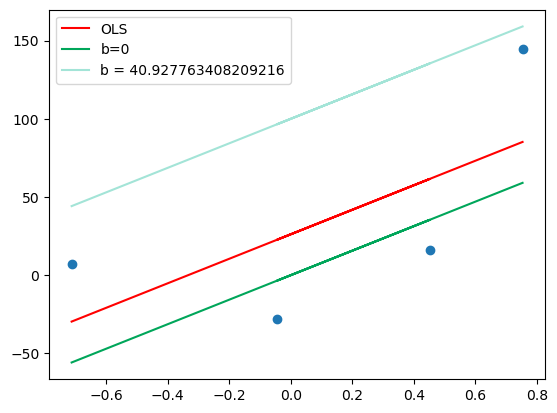

In [74]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = '#00a65a', label = 'b=0')
plt.plot(X, y_pred1, color = '#A3E4D7', label = 'b = {}'.format(new_intercept))
plt.legend()
plt.show()

__Iteration2__

In [75]:
print(f'current interceept {new_intercept}')
b = get_intercept(new_intercept, learning_rate=0.1)
print(f'updated intercept {b}')

current interceept 40.927763408209216
updated intercept 29.11331608985106


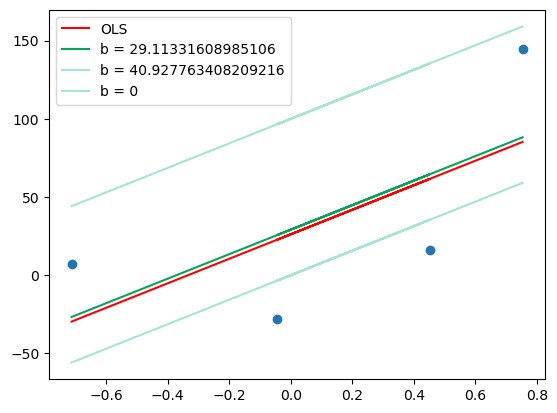

In [76]:
y_pred2 = ((m * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(new_intercept))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

__Iteration 3__

In [77]:
print(f'current intercetpt', b)
b_new = get_intercept(b, learning_rate=0.1)
print(f'Updated intecept, {b_new}')

current intercetpt 29.11331608985106
Updated intecept, 26.750426626179426


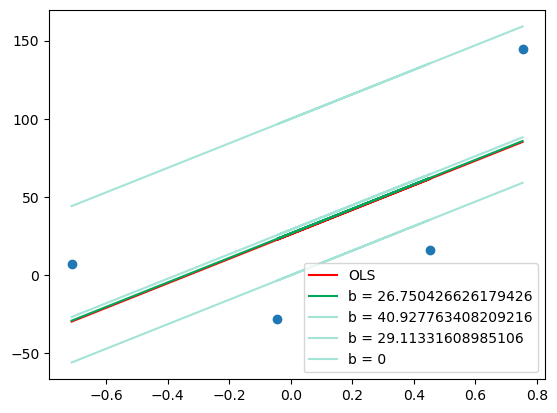

In [79]:
y_pred3 = ((m * X) + b_new).reshape(4)

# plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b_new))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(new_intercept))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

#### __Gradient Descent__

In [80]:
import numpy as np 
from sklearn.datasets import load_diabetes # reading diabetes dataset from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

__Budiling model using LinearRegression class for comparsion__

In [81]:
X, y  = load_diabetes(return_X_y=True)

X.shape, y.shape

((442, 10), (442,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

X_train.shape, y_train.shape

((353, 10), (353,))

In [85]:
print(X_train[0])
print(y_train[0])

[-0.00551455  0.05068012 -0.01590626 -0.06764174  0.0493413   0.07916528
 -0.02867429  0.03430886 -0.01811369  0.04448548]
104.0


In [86]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(reg.intercept_)
print(reg.coef_) # model features weight 

151.4300932966009
[ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]


In [89]:
y_pred = reg.predict(X_test)

In [90]:
print(y_test[:10])
print(y_pred[:10])

[ 78. 152. 200.  59. 311. 178. 332. 132. 156. 135.]
[119.14235853 110.77183282 185.03750644  68.00997114 171.05444208
 190.41916188 218.59009744 119.63375975 157.26867822 129.50082172]


In [91]:
r2_score(y_true=y_test,
         y_pred=y_pred )

0.4384316213369278

_So above r2 score of .43 we have to match throguh the customer gradient descent classes which we'll create_

__Batch Gradient Descent__

In [141]:
class BatchGradientDescentRegressor:

    def __init__(self, learning_rate=0.01, epochs=100):

        self.coef_ = None
        self.intercept_ = None 
        self.lr = learning_rate 
        self.epochs = epochs

    
    def train(self, X_train, y_train):
        '''Training Batch Gradient Descent Regressor'''

        self.coef_ = np.ones(X_train.shape[1]) # model parameter 
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_ 

            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # coef_der = -2 * np.mean(np.dot((y_train - y_hat), X_train)) # giving poor r2 score 
            coef_der = -2 * np.dot((y_train - y_hat), X_train) / len(y_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

Why using `np.mean` is doing poor ?

In batch gradient descent for linear regression, the correct gradient with respect to the coefficients must be computed **feature-wise**, because each feature has its own contribution to the loss. In the first formulation,
`coef_der = -2 * np.mean(np.dot((y_train - y_hat), X_train))`, the dot product already aggregates information across samples, and applying `np.mean()` on top of it collapses the result further into a **single scalar**. This destroys the per-feature gradient information and causes all coefficients to be updated in the same direction and by the same amount, which leads to incorrect optimization behavior and poor convergence, ultimately resulting in a low R² score. In contrast, the second formulation,
`coef_der = -2 * np.dot((y_train - y_hat), X_train) / len(y_train)`, preserves the **vector nature of the gradient**, ensuring that each feature receives its own gradient update. This aligns with the true mathematical gradient of the mean squared error loss, allows gradient descent to move in the correct direction in parameter space, and therefore produces a much better fit and higher R² score.


In [146]:
batchgdr = BatchGradientDescentRegressor(epochs=1000,learning_rate=0.5)
batchgdr

In [143]:
batchgdr.train(X_train, y_train)

In [144]:
print(batchgdr.coef_)
print(batchgdr.intercept_)

[  -6.3257262  -224.53635101  501.48400756  300.5426199   -39.16499761
 -100.51135789 -225.75311607  133.46476231  399.54492368  111.08651019]
151.40072930104594


In [145]:
y_pred = batchgdr.predict(X_test)

r2_score(y_test, y_pred)

0.4333212412208288

__Stochastic Gradient Descent__

In [149]:
class SGDRegressor:

    def __init__(self, learning_rate=0.01, epochs=100):

        self.coef_ = None
        self.intercept_ = None 
        self.lr = learning_rate 
        self.epochs = epochs

    def train(self,X_train,y_train):
        
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [150]:
sgd = SGDRegressor(epochs=40)
sgd.train(X_train, y_train)

In [152]:
y_pred = sgd.predict(X_test)

r2_score(y_test, y_pred)

0.4030501508006682

__Mini Batch Gradient Descent__

In [162]:
class MiniBatchGradientDescentRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def train(self,X_train,y_train):

        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [158]:
# Deciding batch size 

print(X_train.shape[0])
print(int(X_train.shape[0]/50))

bacth_size = int(X_train.shape[0]/50)

353
7


In [163]:
minbatch = MiniBatchGradientDescentRegressor(bacth_size, 0.01, 100)

In [165]:
minbatch.train(X_train, y_train)

y_pred = minbatch.predict(X_test)

In [167]:
y_pred.shape, y_test.shape

((89,), (89,))

In [168]:
r2_score(y_test, y_pred)

0.43403154945367795

--------